<a href="https://colab.research.google.com/github/olyavydrina/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22dl_nlp_ag_news_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина новости
max_news_len = 500
# Количество классов новостей
nb_classes = 2

## Загрузка набора данных

Загружаем данные для обучения

In [ ]:
training_data = pd.read_excel('/content/train.xlsx')
training_data.head()

,class,title,text,link,language
0,0,Плотник ослеп и впал в кому из-за занозы,30-летний житель английского города Сент-Остел...,https://lenta.ru/news/2022/12/12/splinter/,rus
1,1,Зеленский оценил помощь США Украине,"Президент Украины Владимир Зеленский признал, ...",https://lenta.ru/news/2022/12/12/usa/,rus
2,0,Сбившего двух пешеходов и скрывшегося с места ...,"Полицейские задержали водителя иномарки, сбивш...",https://lenta.ru/news/2022/12/12/sbil_i_uyehal/,rus
3,0,Саакашвили ограничили в курении электронных си...,Лечащие врачи бывшего президента Грузии Михаил...,https://lenta.ru/news/2022/12/12/sigaretyfu/,rus
4,0,Россиянка упала под прибывающий поезд в метро ...,Пассажирка упала на пути под прибывающий поезд...,https://lenta.ru/news/2022/12/12/metro/,rus


Загружаем данные для тестирования

In [ ]:
training_data = pd.read_excel('/content/test.xlsx')
training_data.head()

,class,title,text,link,language
0,1,В Германии планировали убить канцлера Олафа Шо...,Немецкий князь Генрих XIII со своими ближайшим...,https://lenta.ru/articles/2022/12/15/reich/,rus
1,1,Албанцы силой захватили власть на севере Косова,Албанцы провели силовой захват власти в муници...,https://lenta.ru/news/2022/12/14/kosowo/,rus
2,1,Посол покинул съезд партии в Сербии после виде...,Посол России в Сербии Александр Боцан-Харченко...,https://lenta.ru/news/2022/12/18/psll/,rus
3,1,Команда Байдена начала подготовку к его предвы...,Команда президента США Джо Байдена начала план...,https://lenta.ru/news/2022/12/18/biden/,rus
4,1,Сборная Хорватии стала бронзовым призером чемп...,Сборная Хорватии по футболу обыграла команду М...,https://lenta.ru/news/2022/12/17/croatiamorocco/,rus


Загружаем имена классов

In [ ]:
training_data = pd.read_csv('/content/classes.txt')
training_data.head()

,World
0,Others


## Просматриваем данные

In [ ]:
!ls

classes.txt  drive  sample_data  test.xlsx  train.xlsx


In [ ]:
!cat classes.txt

World
Others

In [ ]:
!head train.xlsx

y ���!+��E���fMy�k�����K�5=|�t ��G)�s墙�U��tB��)���,���f�����   �� PK     ! ����  �     xl/workbook.xml��Mn�0��z�{��,)�a9�k5PA�&k��,��H*�Qt�^��1�u$Am�l�����{ry}V�s��9�&!F\3S
B啹�x2�sE�W4�g5�˞:���Z�"��C�����JR��ԷXwk�V�>���	T���}�[����a�j,���)K���|Č���L��.SF���Q���JD>f��'���,V퓚�$b�I4��Q�Ք%k��U�i��W�*!�MŖQ+���E��ԫ�Ԅ��z�s���`+����=ka���xɻ�1�Ջ�G�cP/a3څ�`13�V[�YzvI�h2�1Q���k{/�d���L���f��\��0h���F��e=��e�=�Qj�k�3*i)o����qGq�7$,��mG�ل[6ɫa���5	�3�e6�1���x�������h#��F�:c+v�{b=��\G�GY!�Kʳ�rh�%o�{q=��k1w����u�_���6k�yL�s/��Y0���{T��Ó�ԯX"T2<��W�+66����l��Ǜ"Ͳ�"��%N���'�g=Y���J$M�/d<���{A+մ��d�(����^B��e�U�����ʧ�b2��OHB%z���I�t�
 U�{��_��R���W�B��1��<ۤ�Qc�e�5r��kd׃,_�{q��v�]�D�	����E
H��*��_�-�5���5���ٱ.�W��+�������0�l�3�ν����Ӓ���>ۻ ��JD��&�y[�'zo&�Q�z�4�|lQy3O�_�Y�����b��.����W�[
`fb��F�53����XE�.
�&�v+�TT=X��v�E�]>�T����p��i�/W�?0���6?�b�Q)OHp����t�
�',����wN��葿�v�b���1d��JE��)#��?�)�jh�

In [ ]:
!head test.xlsx

y ���!+��E���fMy�k�����K�5=|�t ��G)�s墙�U��tB��)���,���f�����   �� PK     ! ���  �     xl/workbook.xml��Mn�0��z�{��,;�`9�k5PA�&k��,��H*�Qt�^��1�u$Am�l��3C��{rq}�
��59�G#a�-�9����C4��f
��9����o�,N��� ��qB��y%4�#[3�u�H݁��	V�J��I(�ͤ�=!s�aز�\�-o�0��8�X ����h����;6uĭ���J�K�H�l{0ֱ���x2�!|�֒;�mF�"��~cJ⸷�\�R�������L��(��aS� �O!�'�O�5���
f�4M(&�?��q�A�'����
Q�F��e8�Ӕ�q��m�'�Ӧ�|'MaO9�qy���,B��$����G!U��|:�T�g��pD7"ә}�������h����F.��m��#�N���-�&�x���ɇnD��9������݌'Q:�'�,'��t�l&W��f5���	o">D��b.��G�F_D�b����T�a��7   �� PK     ! �W�>�a F    xl/sharedStrings.xml��k�]�u���8ՇBB�")�\�AZ'�si�A�|c�7�TH*n�Ѧn�lѦ��P���4@Q��I�E
p����%�s���>�PRP�"��{��{�5�c�9��_��������]�x����=t�m��=u��3����ۿ{쉇6/�>�����}���~t������Ջ/m��s���3�.=����/>��ѳ�/>r���s��_�����K���w�_|����/>stt�ٳ�O�8�ǟ=}��C���?���:��m�?w�o�?�O��S�=���^<���^�:׿��=:w��#�?~�¥3O�=��+�:u��������<��������k����f���������������������_���п��׻+�

In [ ]:
!wc -l train.xlsx
!wc -l test.xlsx

3000 train.xlsx
618 test.xlsx


## Загружаем данные в память

Выделяем данные для обучения

In [ ]:
news = train['text']

In [ ]:
news[:3]

0    30-летний житель английского города Сент-Остел...
1    Президент Украины Владимир Зеленский признал, ...
2    Полицейские задержали водителя иномарки, сбивш...
Name: text, dtype: object

Выделяем правильные ответы

In [ ]:
y_train = utils.to_categorical(train['class'], nb_classes)

In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

## Токенизация текста

In [ ]:
news[:3]

0    30-летний житель английского города Сент-Остел...
1    Президент Украины Владимир Зеленский признал, ...
2    Полицейские задержали водителя иномарки, сбивш...
Name: text, dtype: object

Создаем токенизатор Keras

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на новостях

In [ ]:
tokenizer.fit_on_texts(news)

Просматриваем словарь токенизатора

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'for': 8,
 'on': 9,
 'de': 10,
 'is': 11,
 'said': 12,
 'with': 13,
 'as': 14,
 '”': 15,
 'was': 16,
 'it': 17,
 'from': 18,
 'la': 19,
 'by': 20,
 'at': 21,
 'have': 22,
 'has': 23,
 'be': 24,
 'are': 25,
 'à': 26,
 'he': 27,
 'but': 28,
 'an': 29,
 'в': 30,
 'en': 31,
 'his': 32,
 'not': 33,
 'les': 34,
 'they': 35,
 'this': 36,
 'who': 37,
 'will': 38,
 '—': 39,
 'or': 40,
 'she': 41,
 'et': 42,
 'their': 43,
 'le': 44,
 'des': 45,
 'were': 46,
 'been': 47,
 'her': 48,
 'had': 49,
 'we': 50,
 'more': 51,
 'its': 52,
 'you': 53,
 'which': 54,
 'after': 55,
 'i': 56,
 'people': 57,
 'about': 58,
 'one': 59,
 'year': 60,
 'also': 61,
 'un': 62,
 'would': 63,
 'и': 64,
 'pour': 65,
 'than': 66,
 'du': 67,
 'new': 68,
 'when': 69,
 'over': 70,
 'на': 71,
 'into': 72,
 'two': 73,
 'up': 74,
 'mr': 75,
 'can': 76,
 'ukraine': 77,
 'all': 78,
 'article': 79,
 'что': 80,
 '–': 81,
 'what': 82,
 'there': 83,
 'years': 8

Преобразуем новости в числовое представление

In [ ]:
sequences = tokenizer.texts_to_sequences(news)

Просматриваем новости в числовом представлении

In [ ]:
index = 1
print(news[index])
print(sequences[index])

Президент Украины Владимир Зеленский признал, что Киеву будет очень сложно без поддержки США. Об этом он сообщил в интервью телеведущему Дэвиду Леттерману для стримингового сервиса Netflix.

«Мы понимаем, что происходит в США, мы за этим следим, это правда, для нас это важно, потому что США — лидер в поддержке Украины, и без их поддержки нам будет сложно, прямо очень сложно. Кстати, вопрос, когда закончится война, также зависит от этой поддержки, чтобы она была короче, нужна более мощная помощь», — заявил политик.

Зеленский отметил, что украинская сторона прислушивается к сигналам со всех сторон. По его словам, «если изменится климат в политике, в Конгрессе», это может сильно повлиять на помощь Киеву. Политик добавил, что в определенный момент Украина была обеспокоена замедлением поддержки.

Ранее телеканал NBC со ссылкой на трех американских чиновников сообщил о намерении США увеличить численность своих военных на Украине для усиления контроля за поставляемым оружием. Отмечается, что

In [ ]:
tokenizer.word_index['президент']

1297

Ограничиваем длину отзывов

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

In [ ]:
x_train[:5]

array([[   0,    0,    0, ..., 1860,  138,  297],
       [   0,    0,    0, ..., 1227, 5491, 5492],
       [   0,    0,    0, ..., 4416,  237, 1604],
       [   0,    0,    0, ..., 2786, 4417, 5502],
       [   0,    0,    0, ..., 5510, 7325,  190]], dtype=int32)

## Cеть LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(2, activation='sigmoid'))

In [ ]:
model_lstm.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 323,170
Trainable params: 323,170
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [ ]:
model_lstm_save_path = '/content/best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_lstm = model_lstm.fit(x_train,
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
1/2 [==============>...............] - ETA: 6s - loss: 0.6931 - accuracy: 0.4922
Epoch 1: val_accuracy improved from -inf to 0.55556, saving model to /content/best_model.h5
2/2 [==============================] - 7s 476ms/step - loss: 0.6936 - accuracy: 0.4856 - val_loss: 0.6929 - val_accuracy: 0.5556
Epoch 2/5
1/2 [==============>...............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5938
Epoch 2: val_accuracy did not improve from 0.55556
2/2 [==============================] - 0s 61ms/step - loss: 0.6908 - accuracy: 0.6379 - val_loss: 0.6929 - val_accuracy: 0.4815
Epoch 3/5
1/2 [==============>...............] - ETA: 0s - loss: 0.6890 - accuracy: 0.6797
Epoch 3: val_accuracy did not improve from 0.55556
2/2 [==============================] - 0s 57ms/step - loss: 0.6880 - accuracy: 0.6955 - val_loss: 0.6929 - val_accuracy: 0.4444
Epoch 4/5
1/2 [==============>...............] - ETA: 0s - loss: 0.6857 - accuracy: 0.7188
Epoch 4: val_accuracy did not improve from 0.55556
2/2 [=

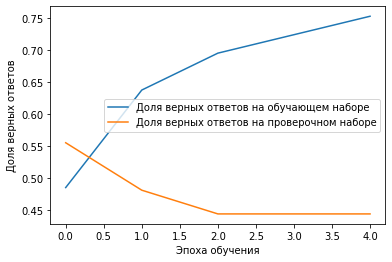

In [ ]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования

In [ ]:
test = pd.read_excel('/content/test.xlsx')

In [ ]:
test

,class,title,text,link,language
0,1,В Германии планировали убить канцлера Олафа Шо...,Немецкий князь Генрих XIII со своими ближайшим...,https://lenta.ru/articles/2022/12/15/reich/,rus
1,1,Албанцы силой захватили власть на севере Косова,Албанцы провели силовой захват власти в муници...,https://lenta.ru/news/2022/12/14/kosowo/,rus
2,1,Посол покинул съезд партии в Сербии после виде...,Посол России в Сербии Александр Боцан-Харченко...,https://lenta.ru/news/2022/12/18/psll/,rus
3,1,Команда Байдена начала подготовку к его предвы...,Команда президента США Джо Байдена начала план...,https://lenta.ru/news/2022/12/18/biden/,rus
4,1,Сборная Хорватии стала бронзовым призером чемп...,Сборная Хорватии по футболу обыграла команду М...,https://lenta.ru/news/2022/12/17/croatiamorocco/,rus
...,...,...,...,...,...
67,1,"Coupe du monde 2022 : la Croatie, troisième, s...",Vous pouvez partager un article en cliquant su...,https://www.lemonde.fr/football/article/2022/1...,frn
68,1,"Iran : arrestation de Taraneh Alidoosti, célèb...",Vous pouvez partager un article en cliquant su...,https://www.lemonde.fr/international/article/2...,frn
69,0,"A part la dinde, y aura qui à Noël ? Les absen...",Vous pouvez partager un article en cliquant su...,https://www.lemonde.fr/m-perso/article/2022/12...,frn
70,0,Arts : l’Afghanistan sous l’œil de ses artiste...,Vous pouvez partager un article en cliquant su...,https://www.lemonde.fr/culture/article/2022/12...,frn


Преобразуем новости в числовое представление

Обратите внимание, что нужно использовать токенизатор, обученный на наборе данных train.

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

In [ ]:
x_test[:5]

array([[5525,  387, 7642, ..., 4463, 4404, 4442],
       [   0,    0,    0, ...,   30, 1603, 3702],
       [   0,    0,    0, ...,   71, 3728, 2038],
       [   0,    0,    0, ...,  291,  851, 7785],
       [   0,    0,    0, ..., 2794,   39,  237]], dtype=int32)

Правильные ответы

In [ ]:
y_test = utils.to_categorical(test['class'], nb_classes)

In [ ]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## Оцениваем качество работы сети на тестовом наборе данных

### Сеть LSTM

In [ ]:
model_lstm.load_weights(model_lstm_save_path)

In [ ]:
model_lstm.evaluate(x_test, y_test, verbose=1)

3/3 [==============================] - 0s 15ms/step - loss: 0.6930 - accuracy: 0.5417


[0.6929876804351807, 0.5416666865348816]